# A Data Analysis of the most common IDE using Stackoverflow’s 2017-2018 Annual Developer Survey.

<p align="center">
<img src="IDE PIC.png">
<p>

## ----------------------------------------------------------------------------------

## Table of Content

1. [Introduction](#1.-Introduction)
<br><br>
2. [Business Understanding](#2.-Business-Understanding)
<br><br>
3. [Data Understanding](#3.-Data-Understanding)
<br><br>
4. [Question 1: What is the most frequently used IDE from 2017 to 2018?](#4.-Question-1:-What-is-the-most-frequently-used-IDE-from-2017-to-2018?)
<br><br>
    4.1. [Data Preperation](#4.1.-Data-Preperation)
<br><br>
    4.2. [Data Modeling](#4.2.-Data-Modeling)
<br><br>
    4.3. [Results Evaluation](#4.3.-Results-Evaluation)
<br><br>
5. [Question 2: What programming languages did each IDE user work with previously in 2018?](#5.-Question-2:-What-programming-languages-did-each-IDE-user-work-with-previously-in-2018?)
<br><br>
    5.1. [Data Preperation](#5.1.-Data-Preperation)
<br><br>
    5.2. [Data Modeling](#5.2.-Data-Modeling)
<br><br>
    5.3. [Results Evaluation](#5.3.-Results-Evaluation)
<br><br>
6. [Question 3: What platforms did each IDE user work with previously in 2018?](#6.-Question-3:-What-platforms-did-each-IDE-user-work-with-previously-in-2018?)
<br><br>
    6.1. [Data Preperation](#6.1.-Data-Preperation)
<br><br>
    6.2. [Data Modeling](#6.2.-Data-Modeling)
<br><br>
    6.3. [Results Evaluation](#6.3.-Results-Evaluation)
<br><br>
7. [Conclusion](#7.-Conclusion)
<br><br>
8. [References](#8.-References)

## ----------------------------------------------------------------------------------

## 1. Introduction

Since 2011, Stack Overflow has asked more than 150 questions to the developer community about everything from their favorite technologies to their job preferences. Since then, they've published new Annual Developer Survey results each year with more than 64,000 respondents from the developers. 

Therefore, with the help of the Data Science field, this project will focus on extracting essential data and discuss the results of the most common IDE using Stackoverflow's Annual Developer Survey from 2017-2018.
IDE is the Integrated Development Environment that provides computer programmers with comprehensive software development facilities. Therefore, this project will focus on IDE by discussing the most commonly used IDE in 2017/2018 and what programming languages and platforms each IDE user prefers.  

The following notebook will follow the CRISP-DM data science process. This process consists of five essential stages: Business Understanding, Data Understanding, Data Preparation, Data Modeling, and Results Evaluation. 

## ----------------------------------------------------------------------------------

## 2. Business Understanding

The following Jupyter Notebook discusses and analyzes the most common IDE data using Stackoverflow's 2017-2018 Annual Developer Survey; to emphasize the importance of working in a comfortable Integrated development environment. 

Therefore, this notebook will analyze data based on three main questions;

1. What is the most commonly used IDE from 2017 to 2018?
<br><br>
2. What programming languages did each IDE user work with previously in 2018?
<br><br>
3. What platforms did each IDE user work with previously in 2018?


## ----------------------------------------------------------------------------------

## 3. Data Understanding 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df_2017 = pd.read_csv('./Dataset/stack-overflow-developer-survey-2017/survey_results_public.csv')
df_2018 = pd.read_csv('./Dataset/stack-overflow-developer-survey-2018/survey_results_public.csv')

## ----------------------------------------------------------------------------------

## 4. Question 1: What is the most frequently used IDE from 2017 to 2018?

## 4.1. Data Preperation

In [3]:
#Preparing the data by removing the missing values
def clean_data(df, column):
    '''
    Drop all rows with missing IDE values
    '''
    df_copy = df
    
    df_copy = df_copy.dropna(subset=[column], axis=0)
    y = df_copy[column]
    
    return y

new2017 = pd.DataFrame(clean_data(df_2017, 'IDE'))
new2018 = pd.DataFrame(clean_data(df_2018, 'IDE'))

In [4]:
#Spliting the IDE column
def split(df, column):
    '''
    Split the column by ';'
    Returns a splited list
    '''
    df_copy = df
    ColumnList = df_copy[column].apply(lambda x: x.split(';'))
    return ColumnList


IDE_2017 = split(new2017, 'IDE')
IDE_2018 = split(new2018, 'IDE')

In [5]:
#Flating the nested list of the IDE column
def flat(List):
    '''
    Flat a nested list,
    Returns a flat list.
    '''
    flat_list = []
    for row in List:
        for Object in row:
            flat_list.append(Object.strip())
            
    return flat_list

# Flatting nested list objects.
List_IDE_2017 = flat(IDE_2017)
List_IDE_2018 = flat(IDE_2018)

In [6]:
#A dictionary with all uniqe IDE, count and year
def Count_List(list_data, column, year):
    '''
    Count and group the list of IDE,
    Results are returned in a dictionary
    '''
    group_list = dict(Counter(list_data))
    group_dict = [{column:key, 'Count': value, 'Year': year} for key, value in group_list.items()]
    return group_dict


dict_IDE_2017 = Count_List(List_IDE_2017, 'IDE', '2017')
dict_IDE_2018 = Count_List(List_IDE_2018, 'IDE', '2018')

## 4.2. Data Modeling

In [7]:
# Create and join two dataframe with the list of IDE
def create_dataframe(data_dicts): 
    '''
    Create two dataframes and join them,
    Returns one appended dataframe.
    '''
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])
    df = df1.append(df2)
    return df

#Seperated Dataframes
Dataframe_IDE_2017 = pd.DataFrame(dict_IDE_2017)
Dataframe_IDE_2018 = pd.DataFrame(dict_IDE_2018)

#Joined Dataframes
IDE_Dataframe = create_dataframe([dict_IDE_2017, dict_IDE_2018])

In [8]:
# Display the Joined Dataframes
IDE_Dataframe

,IDE,Count,Year
0,Atom,6540,2017
1,Xcode,3850,2017
2,Notepad++,12681,2017
3,Vim,9679,2017
4,PyCharm,3268,2017
5,RubyMine,613,2017
6,Visual Studio,13677,2017
7,Visual Studio Code,6826,2017
8,Sublime Text,9978,2017
9,IntelliJ,7418,2017


In [9]:
# Add a column to show the percentage of each IDE
def percentage(df, column):
    '''
    Scale data,
    Returns data scaled.
    '''
    df_copy = df
    series = []
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                        df_copy[df_copy[column] == val]['Count'].sum())
    
    joined = pd.Series()
    for i_series in series:
        joined = joined.append(i_series)
        
    return joined

IDE_Dataframe['Percentage'] = percentage(IDE_Dataframe, 'Year') * 100
IDE_Dataframe['Percentage'] = percentage(IDE_Dataframe, 'Year') * 100

In [10]:
# Select the highest 11 IDEs
Top11_Common_IDE = IDE_Dataframe.sort_values(by=['Percentage'], ascending=False).head(20)['IDE'].unique()
chart = IDE_Dataframe[IDE_Dataframe['IDE'].isin(Top11_Common_IDE)]

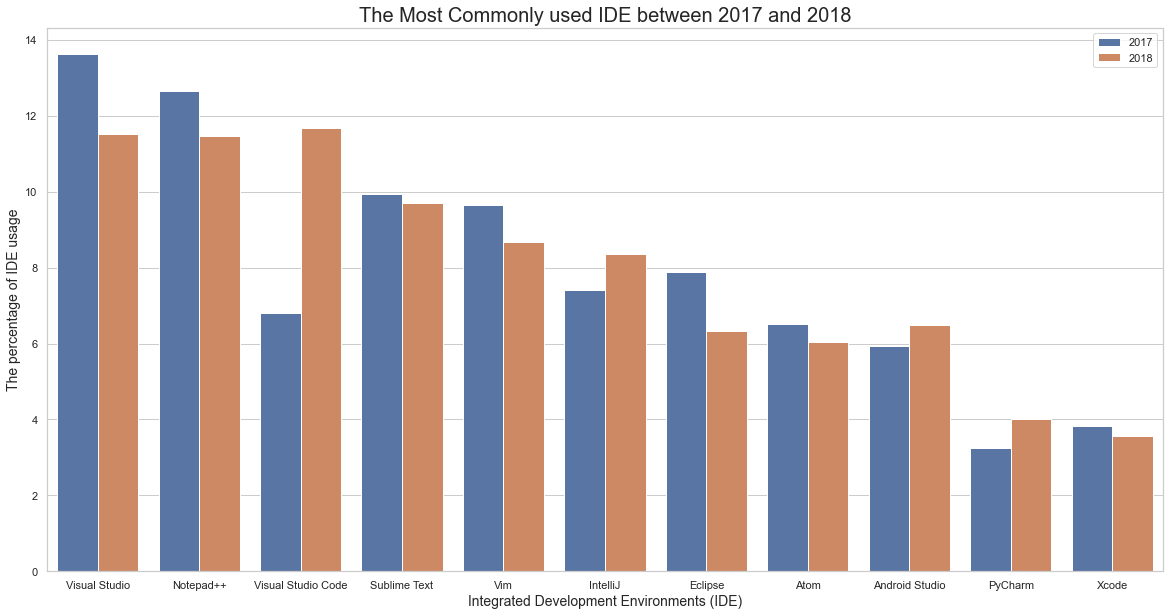

In [11]:
# Plot the highest 11 IDEs in 2017 and 2018
plt.figure(figsize=(20,10))
sns.set(style="whitegrid", color_codes= True)
sns.barplot(x = 'IDE', 
            y = 'Percentage',
            hue = 'Year',
            data = chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Integrated Development Environments (IDE)", fontsize = 14)
plt.ylabel("The percentage of IDE usage", fontsize = 14)
plt.legend(title_fontsize='40')
plt.title('The Most Commonly used IDE between 2017 and 2018', size = 20)
plt.show()

## 4.3. Results Evaluation

After analyzing the datasets from Stackoverflow's 2017-2018 annual developer survey, the above bar graph represents the most commonly used Integrated Development Environments (IDE) between 2017 and 2018. Based on the dataset, there are 21 IDEs in common mentioned in both years 2017 and 2018. However, the bar graph captures the top 11 used IDEs. 

Hence, the results indicate that;

1. The most used IDE in 2017 is Visual Studio, with almost 13.6%, and the most used IDE in 2018 is Visual Studio Code, with nearly 11.7%.
<br><br>
2. The least used IDE in 2017 is PyCharm and Xcode in 2018, with 3.3% and 3.6%, respectively. 
<br><br>
3. Visual Studio Code was the only IDE that raised significantly in 2018 by almost 5% and became the most commonly used IDE in 2018.
<br><br>
4. Sublime Text was the least IDE affected in 2018 compared to other IDEs.
<br><br>
5. All Integrated Development Environments usage decreased in 2018 except for Visual Studio Code, IntelliJ, Android Studio, and PyCharm.

## ----------------------------------------------------------------------------------

## 5. Question 2: What programming languages did each IDE user work with previously in 2018?

## 5.1. Data Preperation

In [12]:
#Preparing the data by removing the missing values
Clean_HaveWorkedLanguage_2017 = pd.DataFrame(clean_data(df_2017, 'HaveWorkedLanguage'))
Clean_HaveWorkedLanguage_2018 = pd.DataFrame(clean_data(df_2018, 'LanguageWorkedWith'))

#Spliting the columns
WorkedLang_2017 = split(Clean_HaveWorkedLanguage_2017, 'HaveWorkedLanguage')
WorkedLang_2018 = split(Clean_HaveWorkedLanguage_2018, 'LanguageWorkedWith')

#Flating the nested list
List_WorkedLang_2017 = flat(WorkedLang_2017)
List_WorkedLang_2018 = flat(WorkedLang_2018)

#A dictionary with all uniqe values, count and year
dict_WorkedLang_2017 = Count_List(List_WorkedLang_2017, 'WorkedLang', '2017')
dict_WorkedLang_2018 = Count_List(List_WorkedLang_2018, 'WorkedLang', '2018')

#Seperated Dataframes
Dataframe_WorkedLang_2017 = pd.DataFrame(dict_WorkedLang_2017)
Dataframe_WorkedLang_2018 = pd.DataFrame(dict_WorkedLang_2018)

# Create and join two dataframe
WorkedLang_Dataframe = create_dataframe([dict_WorkedLang_2017, dict_WorkedLang_2018])

In [13]:
# Display the WorkedLanguages Dataframe in 2018
Dataframe_WorkedLang_2018

,WorkedLang,Count,Year
0,JavaScript,54686,2018
1,Python,30359,2018
2,HTML,53628,2018
3,CSS,50979,2018
4,Bash/Shell,31172,2018
5,C#,26954,2018
6,SQL,44670,2018
7,TypeScript,13626,2018
8,C,18042,2018
9,C++,19872,2018


In [14]:
#Count the number of IDEs used by each programming language
row = []
for j in list(zip(WorkedLang_2018, IDE_2018)):
    for i in j[0]:
        row.append({
            'Worked_Languages': i, 
            'IDE_Used': Counter(j[1])
        })
        
WorkedLang_IDE = pd.DataFrame(row).groupby('Worked_Languages').agg({'IDE_Used': 'sum'}).reset_index()

## 5.2. Data Modeling

In [15]:
#Calculate the relation between each programming language and IDE
for row in Dataframe_IDE_2018['IDE']:
    #print(row)
    WorkedLang_IDE.insert(loc=2, column=row, value=0, allow_duplicates=True)
    
for index, row in WorkedLang_IDE.iterrows():
    total = sum([value for key, value in dict(row['IDE_Used']).items()])
    for key, value in dict(row['IDE_Used']).items():
         WorkedLang_IDE[key].loc[index] = (value / total)

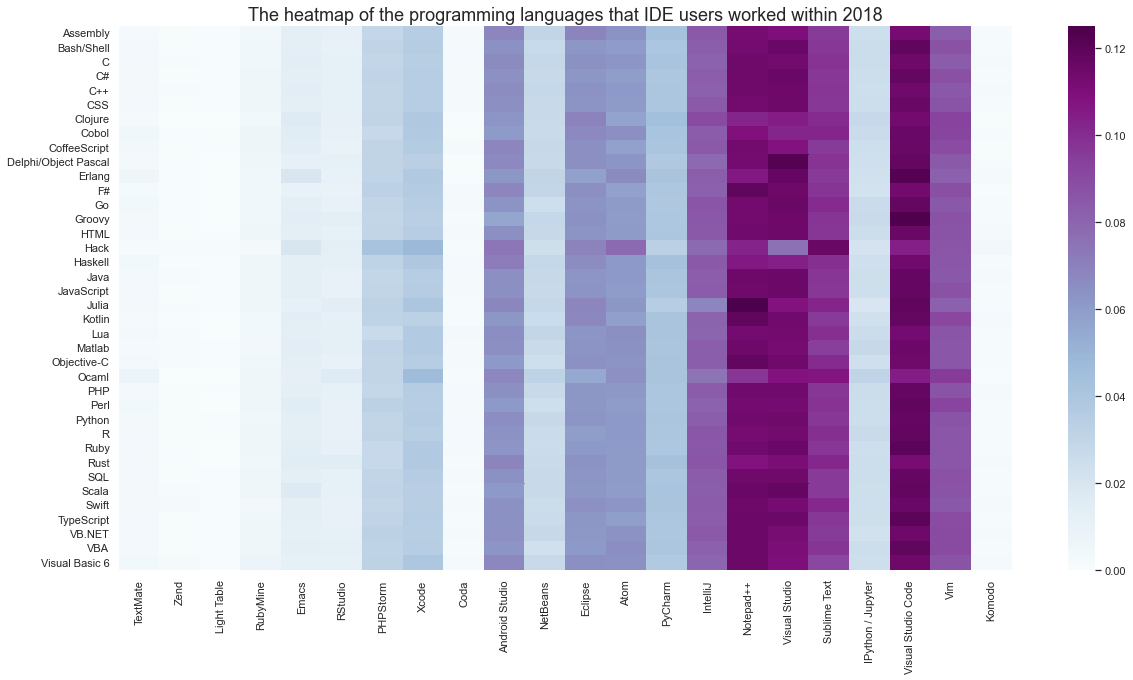

In [16]:
#Plot the relation between each programming language and IDE using a heatmap
plot = WorkedLang_IDE.drop('IDE_Used', axis=1).set_index('Worked_Languages')

plt.figure(figsize=(20, 10))
sns.heatmap(plot, cmap = "BuPu")
plt.title('The heatmap of the programming languages that IDE users worked within 2018', size = 18)
plt.ylabel('')
plt.show()

## 5.3. Results Evaluation

This section demonstrates the relation between the "languages worked with" and "IDE" in 2018 through a heatmap.

The following heatmap indicates that; 

1. Some IDE users haven't worked with programming languages such as Coda, Komodo, Zend, Light Table, etc. One possible reason for the low percentages is the low use of these IDEs.
<br><br>
2. There is a high correlation between some IDEs and all programming languages like Notepad++, Visual Studio, Visual Studio Code, Sublime Text, Vim, and IntelliJ.
<br><br>
3. Atom has a higher correlation with Hack, with almost 0.08 percent.
<br><br>
4. Other IDEs like Android Studio and Eclipse correlate with programming languages that vary between 0.08 and 0.04.

## ----------------------------------------------------------------------------------

## 6. Question 3: What platforms did each IDE user work with previously in 2018?

## 6.1. Data Preperation

In [17]:
#Preparing the data by removing the missing values
Clean_HaveWorkedPlatform_2017 = pd.DataFrame(clean_data(df_2017, 'HaveWorkedPlatform'))
Clean_HaveWorkedPlatform_2018 = pd.DataFrame(clean_data(df_2018, 'PlatformWorkedWith'))

#Spliting the columns
WorkedPlatform_2017 = split(Clean_HaveWorkedPlatform_2017, 'HaveWorkedPlatform')
WorkedPlatform_2018 = split(Clean_HaveWorkedPlatform_2018, 'PlatformWorkedWith')

#Flating the nested list
List_WorkedPlatform_2017 = flat(WorkedPlatform_2017)
List_WorkedPlatform_2018 = flat(WorkedPlatform_2018)

#A dictionary with all uniqe values, count and year
dict_WorkedPlatform_2017 = Count_List(List_WorkedPlatform_2017, 'WorkedPlatform', '2017')
dict_WorkedPlatform_2018 = Count_List(List_WorkedPlatform_2018, 'WorkedPlatform', '2018')

#Seperated Dataframes
Dataframe_WorkedPlatform_2017 = pd.DataFrame(dict_WorkedPlatform_2017)
Dataframe_WorkedPlatform_2018 = pd.DataFrame(dict_WorkedPlatform_2018)

# Create and join two dataframe
WorkedPlatform_Dataframe = create_dataframe([dict_WorkedPlatform_2017, dict_WorkedPlatform_2018])

In [18]:
# Display the WorkedPlatform Dataframe in 2018
Dataframe_WorkedPlatform_2018

,WorkedPlatform,Count,Year
0,AWS,15927,2018
1,Azure,7267,2018
2,Linux,31859,2018
3,Firebase,9575,2018
4,Arduino,7006,2018
5,Windows Desktop or Server,23393,2018
6,Heroku,6913,2018
7,Amazon Echo,1938,2018
8,iOS,10201,2018
9,Mac OS,11822,2018


In [19]:
#Count the number of IDEs used by each platform
row = []
for j in list(zip(WorkedPlatform_2018, IDE_2018)):
    for i in j[0]:
        row.append({
            'Worked_Platform': i, 
            'IDE_Used': Counter(j[1])
        })
        
WorkedPlatform_IDE = pd.DataFrame(row).groupby('Worked_Platform').agg({'IDE_Used': 'sum'}).reset_index()

## 6.2. Data Modeling

In [20]:
#Calculate the relation between each platform and IDE
for row in Dataframe_IDE_2018['IDE']:
    #print(row)
    WorkedPlatform_IDE.insert(loc=2, column=row, value=0, allow_duplicates=True)
    
for index, row in WorkedPlatform_IDE.iterrows():
    total = sum([value for key, value in dict(row['IDE_Used']).items()])
    for key, value in dict(row['IDE_Used']).items():
         WorkedPlatform_IDE[key].loc[index] = (value / total)

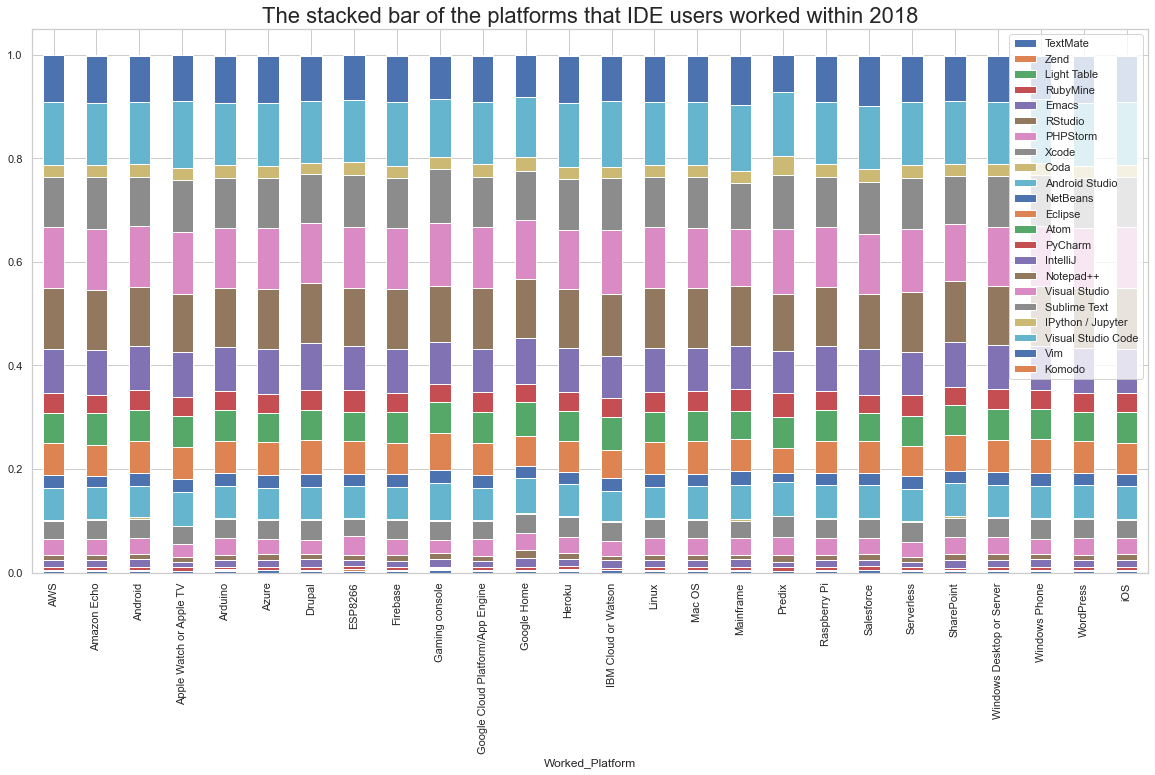

In [21]:
#Plot the relation between each platform and IDE using a heatmap
df = WorkedPlatform_IDE.drop('IDE_Used', axis=1).set_index('Worked_Platform')

df.plot(kind='bar', stacked=True, figsize=(20, 10))

plt.title('The stacked bar of the platforms that IDE users worked within 2018', size = 22)
plt.ylabel('')
plt.show()

## 6.3. Results Evaluation

This section demonstrates the relation between the "platforms worked with" and "IDE" in 2018 through a stacked bar graph.

The following bar graph indicates that; 

1. Some IDE users haven't worked with platforms such as Coda, Komodo, Zend, Light Table, etc. One possible reason for not using the platforms is the low use of these IDEs.
<br><br>
2. All platforms use Notepad++, Visual Studio, Visual Studio Code, Sublime Text, Vim, and IntelliJ, with a percentage that varies between 0.13 and 0.1.
<br><br>
3. Platforms use other IDEs like Android Studio, Eclipse, and Atom with an average of 0.07.

## ----------------------------------------------------------------------------------

## 7. Conclusion

In conclusion, the above notebook has discussed the results of the most common IDE using Stackoverflow's Annual Developer Survey from 2017-2018 using the CRISP-DM data science process. It used three different data visualization to demonstrate the results of each question such as bar graph, heatmap, and stacked bar graph. Nonetheless, it showed the effect of the user's choices of programming languages and platforms based on the IDE. 

## ----------------------------------------------------------------------------------

## 8. References

Stack Overflow Annual Developer Survey: https://insights.stackoverflow.com/survey 